**Practicing Neural Networks with the fashion MNIST dataset**
---------------------------------

### Loading the fashion MNIST data 
The data can be loaded directly from keras (`keras.datasets.fashion_mnist`).

```python
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
# load data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

-------------------
### Data Exploration

- **Task 1:** Explore the pictures and labels. 
    - Try displaying a picture of each class in jupyter.
    
    
- **Task 2:** Normalize the data to be between 0 and 1. 
    - Write down in a new markdown cell, **why** should we do this?

In [3]:
# Explore the data
print(train_images.shape) # (60000, 28, 28)

(60000, 28, 28)


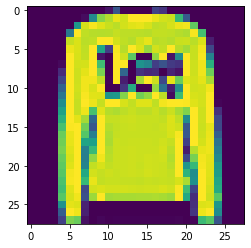

In [28]:
# print the first image in the training set

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(test_images[1])
plt.show()



In [29]:
# explore the labels
print(train_labels[0:10]) # [9 0 0 3 0 2 7 2 5 5]
print(test_labels[0:10]) # [9 0 0 3 0 2 7 2 5 5]


[9 0 0 3 0 2 7 2 5 5]
[9 2 1 1 6 1 4 6 5 7]


In [30]:
#Display a picture of each class T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot

# create a dictionary of class names
class_names = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat',
                5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

# create a function to display a picture of each class
def display_pictures(data, labels):
    # create an empty list for each class
    for i in range(0,10):
        class_list = []
        # loop through the labels and append the image to the corresponding class
        for j in range(0, len(labels)):
            if labels[j] == i:
                class_list.append(data[j])
        # display the first image of each class
        imgplot = plt.imshow(class_list[0])
        plt.title(class_names[i])
        plt.show()

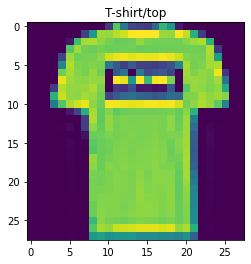

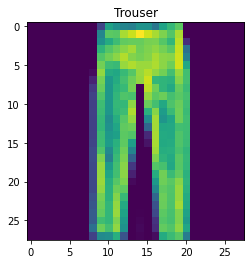

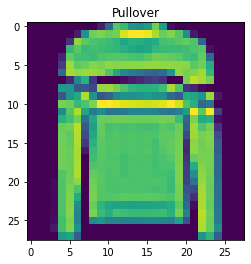

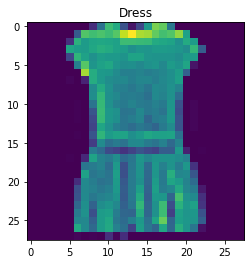

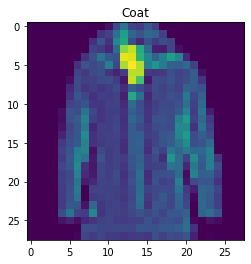

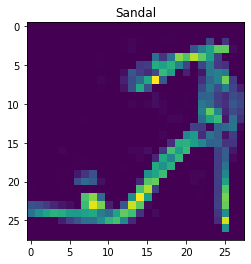

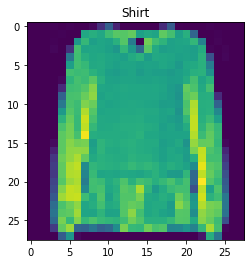

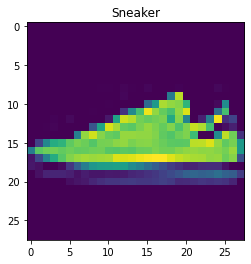

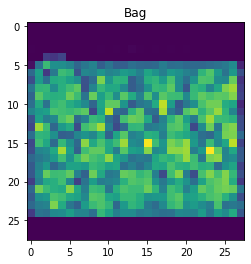

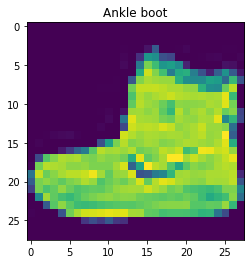

In [31]:
# display a picture of each class

display_pictures(train_images, train_labels)

In [3]:
# print shape of training set
print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


In [4]:
print(test_images.shape) # (10000, 28, 28)

(10000, 28, 28)


----------------------
### Training NN model 

Step 1  -  Build the architecture

Step 2  -  Compile the model 

Step 3  -  Train the model

Step 4  -  Evaluate the model 

In [ ]:
# Build the model
# 1. Set up the layers
# 2. Compile the model
# 3. Fit the model to the training data
# 4. Evaluate the model on the test data
# 5. Save the model
# 6. Load the model

In [4]:
from tensorflow.keras.models import Sequential        # Helper to build a network from a sequence of layers
from tensorflow.keras.layers import Dense             # Fully-connected layer
from tensorflow.keras.callbacks import EarlyStopping  # To stop training early if val loss stops decreasing

In [5]:
# 1. Set up the layers

# create a sequential model
network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784, activation='sigmoid', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
network.fit(train_images, train_labels, epochs=25, batch_size=256)

Epoch 1/25
235/235 [==============================] - 2s 10ms/step - loss: 0.6582 - accuracy: 0.8686
Epoch 2/25
235/235 [==============================] - 2s 9ms/step - loss: 0.5383 - accuracy: 0.8794
Epoch 3/25
235/235 [==============================] - 2s 9ms/step - loss: 0.4610 - accuracy: 0.8881
Epoch 4/25
235/235 [==============================] - 2s 9ms/step - loss: 0.4071 - accuracy: 0.8934
Epoch 5/25
235/235 [==============================] - 2s 10ms/step - loss: 0.3711 - accuracy: 0.8979
Epoch 6/25
235/235 [==============================] - 2s 10ms/step - loss: 0.3408 - accuracy: 0.9014
Epoch 7/25
235/235 [==============================] - 2s 10ms/step - loss: 0.3173 - accuracy: 0.9067
Epoch 8/25
235/235 [==============================] - 2s 10ms/step - loss: 0.2987 - accuracy: 0.9086
Epoch 9/25
235/235 [==============================] - 2s 9ms/step - loss: 0.2789 - accuracy: 0.9134
Epoch 10/25
235/235 [==============================] - 2s 9ms/step - loss: 0.2624 - accuracy: 0

In [10]:
# 4. Evaluate the model on the test data
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.3530 - accuracy: 0.8946
